In [1]:
from sklearn.datasets import load_digits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image = load_digits()

In [4]:
image.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
image['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
image['target']


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
#transform np 2D array into pd df
image_data = pd.DataFrame(image['data'])
image_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


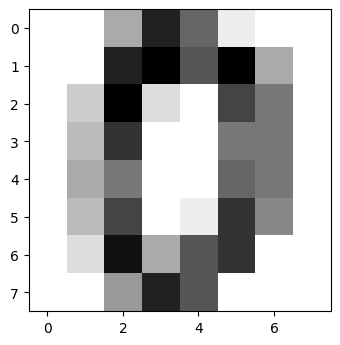

In [10]:
image1 = image_data.iloc[0]
np_image = image1.values
#array size 64 do 8x8
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

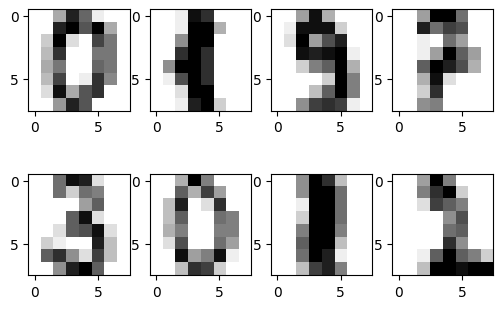

In [11]:
f, axarr = plt.subplots(2,4)
#first row: image 1, 100, 200, 300
axarr[0,0].imshow(image_data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0,1].imshow(image_data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0,2].imshow(image_data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0,3].imshow(image_data.iloc[299].values.reshape(8,8), cmap='gray_r')
#second row: image 1000,1100,1200,1300
axarr[1,0].imshow(image_data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1,1].imshow(image_data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1,2].imshow(image_data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1,3].imshow(image_data.iloc[1299].values.reshape(8,8), cmap='gray_r')


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [13]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy



In [14]:
labels = pd.Series(image['target'])

In [15]:
#cross validation with 4 k fold
def cross_validation(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(image_data):
        train_features, test_features = image_data.loc[train_index], image_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies
        

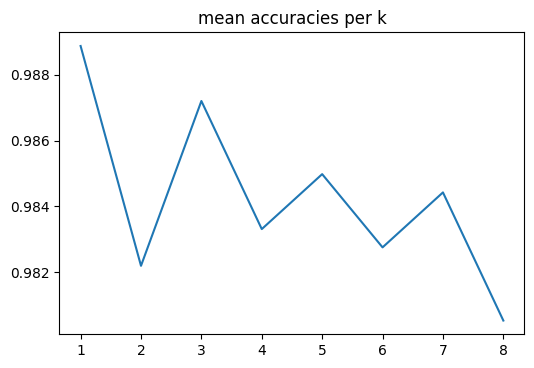

In [16]:
#try cross validation from 1-8
kvalues = list(range(1,9))
k_overall_accuracies = []

for k in kvalues:
    k_accuracies = cross_validation(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.title('mean accuracies per k')
plt.plot(kvalues, k_overall_accuracies)

now neural network

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy

In [22]:
def cross_validation(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2, shuffle = True)
    for train_index, test_index in kf.split(image_data):
        train_features, test_features = image_data.loc[train_index], image_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies
        

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

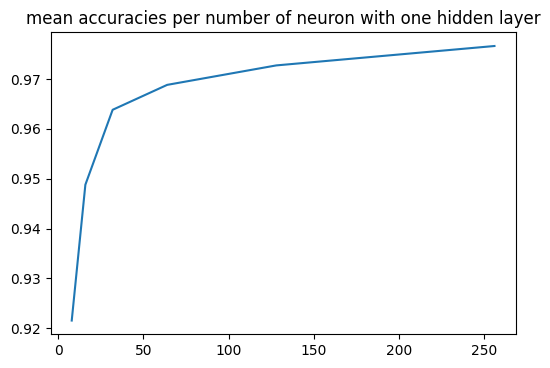

In [23]:
#one hidden layer
#try 8,16, 32,64,128,256 neurons in one hidden layer

nn_one_neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validation(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.title('mean accuracies per number of neuron with one hidden layer')
x=[i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

now 2 hidden layers still 4 k folds cross validation

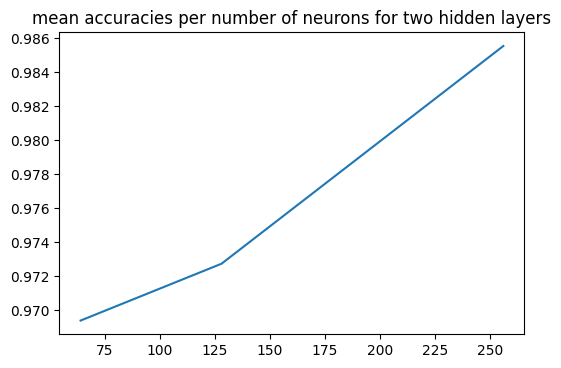

In [24]:
nn_two_neurons = [(64,64),(128,128),(256,256)]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validation(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.title('mean accuracies per number of neurons for two hidden layers')
x=[i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)